## Ethereum Data Preparation


In [3]:
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime, date
from functools import reduce

In [4]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment 
#this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [5]:
# Load the fear and greed sentiment data for Bitcoin (only fear and greed index)
fng_df = pd.read_csv('fng.csv')
fng_df = fng_df.rename(columns={'date':'Date', 'value_classification':'fng_class'})
fng_df = fng_df.drop(columns=['value'])
mapping = {'Extreme Fear':'-1.0', 'Fear':'-0.5', 'Neutral':'0.0', 
        'Greed':'0.5', 'Extreme Greed':'1.0'}
fng_df['fng_class'] = fng_df['fng_class'].map(mapping)
fng_df['fng_class'] = pd.to_numeric(fng_df['fng_class'])
fng_df['fng_class'] = fng_df['fng_class'].astype(float)
fng_df.tail()

,Date,fng_class
715,2019-02-01,-1.0
716,2019-01-31,-1.0
717,2019-01-30,-1.0
718,2019-01-29,-1.0
719,2019-01-28,-0.5


In [6]:
fng_df.set_index(['Date'], inplace=True)
fng_df.tail()

,fng_class
Date,
2019-02-01,-1.0
2019-01-31,-1.0
2019-01-30,-1.0
2019-01-29,-1.0
2019-01-28,-0.5


In [7]:
# Load the vader sentiment data for Ethereum
eth_vader_df = pd.read_csv('eth_vader.csv', infer_datetime_format=True, parse_dates=True)
eth_vader_df["Publish Date"] = [date[0:10] for date in eth_vader_df["Publish Date"]]
eth_vader_df = eth_vader_df.drop(columns=["Post ID", "Title", "Url", "Author", "Score", "Total No. of Comments", "Permalink",
        "title_pos", "title_neu", "title_neg", "title_sent"], axis=1)
eth_vader_df.rename(columns = {'Publish Date':'Date', 'title_compound': 'vader_compound'}, inplace = True)
eth_vader_df['vader_compound'] = eth_vader_df['vader_compound'].astype(float).round(decimals=2)
eth_vader_df.head()

,Date,vader_compound
0,2019-01-24,0.20
1,2019-02-05,0.00
2,2019-02-06,-0.59
3,2019-02-13,0.00
4,2019-02-13,0.00


In [8]:
eth_vader_df.set_index(['Date'], inplace=True)
eth_vader_df.head()

,vader_compound
Date,
2019-01-24,0.20
2019-02-05,0.00
2019-02-06,-0.59
2019-02-13,0.00
2019-02-13,0.00


In [9]:
# Load the historical closing prices for Ethereum
eth_close_df = pd.read_csv('ethprices.csv')
eth_close_df = eth_close_df.sort_index()
eth_close_df = eth_close_df.rename(columns={'date':'Date', 'close':'close_price'})
eth_close_df = eth_close_df.drop(["symbol", "volume"], axis=1)
#eth_close_df['Close Price'] = pd.to_numeric(eth_close_df['Close Price'])
#eth_close_df['Close Price'] = eth_close_df['Close Price'].astype(int)
eth_close_df.head()

,Date,close_price
0,2019-01-28,105.43
1,2019-01-29,104.01
2,2019-01-30,107.50
3,2019-01-31,105.74
4,2019-02-01,105.69


In [10]:
eth_close_df.set_index(['Date'], inplace=True)
eth_close_df.head()

,close_price
Date,
2019-01-28,105.43
2019-01-29,104.01
2019-01-30,107.50
2019-01-31,105.74
2019-02-01,105.69


In [11]:
# Load the exponential weighted moving average data for Ethereum
eth_ewm_df = pd.read_csv('eth_ema.csv')
eth_ewm_df = eth_ewm_df.sort_index()
eth_ewm_df = eth_ewm_df.rename(columns={'date':'Date', 'crossover_signal':'ewm_cross_signal'})
eth_ewm_df = eth_ewm_df.drop(["symbol", "close", "volume", "daily_return", "fast_close", "slow_close", "crossover_long", "crossover_short"], axis=1)
eth_ewm_df['ewm_cross_signal'] = eth_ewm_df['ewm_cross_signal'].astype(float)
eth_ewm_df.head()

,Date,ewm_cross_signal
0,2019-01-28,0.0
1,2019-01-29,-1.0
2,2019-01-30,1.0
3,2019-01-31,1.0
4,2019-02-01,1.0


In [12]:
eth_ewm_df.set_index(['Date'], inplace=True)
eth_ewm_df.head()

,ewm_cross_signal
Date,
2019-01-28,0.0
2019-01-29,-1.0
2019-01-30,1.0
2019-01-31,1.0
2019-02-01,1.0


In [13]:
# Load the money flow index for Ethereum
eth_mfi_df = pd.read_csv('mfi_eth.csv')
eth_mfi_df = eth_mfi_df.sort_index()
eth_mfi_df = eth_mfi_df.rename(columns={'date':'Date'})
eth_mfi_df = eth_mfi_df.drop(["symbol", "close", "volume", "Buy", "Sell"], axis=1)
eth_mfi_df['MFI'] = eth_mfi_df['MFI'].round(decimals=2)
eth_mfi_df.head()

,Date,MFI
0,2019-02-11,39.15
1,2019-02-12,49.83
2,2019-02-13,43.22
3,2019-02-14,45.43
4,2019-02-15,53.56


In [14]:
eth_mfi_df.set_index(['Date'], inplace=True)
eth_mfi_df.head()

,MFI
Date,
2019-02-11,39.15
2019-02-12,49.83
2019-02-13,43.22
2019-02-14,45.43
2019-02-15,53.56


In [15]:
# Load the money flow index for Ethereum
eth_google_df = pd.read_csv('eth_google.csv')
eth_google_df = eth_google_df.sort_index()
eth_google_df = eth_google_df.rename(columns={'Google Search Count':'google_search_count'})
eth_google_df['google_search_count'] = eth_google_df['google_search_count'].astype(float)
eth_google_df.head()

,Date,google_search_count
0,2019-01-28,5.0
1,2019-01-29,5.0
2,2019-01-30,5.0
3,2019-01-31,5.0
4,2019-02-01,5.0


In [16]:
eth_google_df.set_index(['Date'], inplace=True)
eth_google_df.head()

,google_search_count
Date,
2019-01-28,5.0
2019-01-29,5.0
2019-01-30,5.0
2019-01-31,5.0
2019-02-01,5.0


In [17]:
eth_vader_df['vader_compound'] = eth_vader_df['vader_compound'].replace (np.nan, 0)
display(eth_vader_df.dtypes)
eth_vader_df.head()

vader_compound    float64
dtype: object

,vader_compound
Date,
2019-01-24,0.20
2019-02-05,0.00
2019-02-06,-0.59
2019-02-13,0.00
2019-02-13,0.00


In [18]:
# MERGE the closing price, ewm, fng, mfi, and Google DataFrames into a single DataFrame

eth_dfs = [eth_close_df, eth_ewm_df, fng_df, eth_mfi_df, eth_google_df]
eth_data_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), eth_dfs)
eth_df = eth_data_df.merge(eth_vader_df, on = 'Date', how = 'left')
eth_df.replace(np.nan, 0)
eth_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound
Date,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,NaN
2019-02-12,121.18,1.0,-0.5,49.83,7.0,NaN
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-14,119.37,1.0,0.0,45.43,7.0,NaN


In [19]:
eth_df['vader_compound'] = eth_df['vader_compound'].fillna(0)
eth_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound
Date,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0


In [20]:
# Load the gas price data for Ethereum
eth_gas_df = pd.read_csv('eth_gas_price.csv')
eth_gas_df = eth_gas_df.sort_index()
eth_gas_df["f0_"] = [date[0:10] for date in eth_gas_df["f0_"]]
eth_gas_df = eth_gas_df.rename(columns={'f0_':'Date'})
eth_gas_df["std_gas"] = (eth_gas_df['f1_'] - eth_gas_df['f1_'].min())/(eth_gas_df['f1_'].max() - eth_gas_df['f1_'].min())
eth_gas_df.head()

,Date,f1_,std_gas
0,2020-05-31,2.412045e+16,0.027868
1,2019-11-04,1.009714e+16,0.009252
2,2019-07-19,1.411999e+16,0.014593
3,2019-09-02,1.206192e+16,0.011860
4,2019-05-24,1.359907e+16,0.013901


In [21]:
eth_gas_df.set_index(['Date'], inplace=True)
eth_gas_df = eth_gas_df.drop(columns=['f1_'], axis=1)
eth_gas_df.head()

,std_gas
Date,
2020-05-31,0.027868
2019-11-04,0.009252
2019-07-19,0.014593
2019-09-02,0.011860
2019-05-24,0.013901


In [22]:
# Load the mining difficulty data for Ethereum
eth_diff_df = pd.read_csv('mining_diff.csv')
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df["f0_"] = [date[0:10] for date in eth_diff_df["f0_"]]
eth_diff_df = eth_diff_df.rename(columns={'f0_':'Date'})
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df['f1_'] = eth_diff_df['f1_'].astype(float)
eth_diff_df["std_diff"] = (eth_diff_df['f1_'] - eth_diff_df['f1_'].min())/(eth_diff_df['f1_'].max() - eth_diff_df['f1_'].min())
eth_diff_df.head()

,Date,f1_,std_diff
0,2019-02-08,1.167596e+19,0.408881
1,2020-12-07,2.343569e+19,0.848444
2,2019-01-11,1.498385e+19,0.532525
3,2020-01-30,1.327609e+19,0.468691
4,2019-05-15,1.311831e+19,0.462793


In [23]:
eth_diff_df.set_index(['Date'], inplace=True)
eth_diff_df = eth_diff_df.drop(columns=['f1_'], axis=1)
eth_diff_df.head()

,std_diff
Date,
2019-02-08,0.408881
2020-12-07,0.848444
2019-01-11,0.532525
2020-01-30,0.468691
2019-05-15,0.462793


In [24]:
# Load the actual ethereum value (transfers) data for Ethereum (volume of transactions by day)
eth_value_df = pd.read_csv('actual_eth_value.csv') #, index_col="date", infer_datetime_format=True, parse_dates=True)
eth_value_df = eth_value_df.sort_index()
eth_value_df["f0_"] = [date[0:10] for date in eth_value_df["f0_"]]
eth_value_df = eth_value_df.rename(columns={'f0_':'Date'})
eth_value_df['f1_'] = eth_value_df['f1_'].astype(float)
eth_value_df["std_value"] = (eth_value_df['f1_'] - eth_value_df['f1_'].min())/(eth_value_df['f1_'].max() - eth_value_df['f1_'].min())
eth_value_df.head()

,Date,f1_,std_value
0,2019-04-24,3.490000e+24,0.366645
1,2019-04-03,4.170000e+24,0.441157
2,2020-08-12,4.200000e+24,0.444444
3,2020-09-01,6.880000e+24,0.738111
4,2021-01-17,1.440000e+23,0.000000


In [25]:
eth_value_df.set_index(['Date'], inplace=True)
eth_value_df = eth_value_df.drop(columns=['f1_'], axis=1)
eth_value_df.head()

,std_value
Date,
2019-04-24,0.366645
2019-04-03,0.441157
2020-08-12,0.444444
2020-09-01,0.738111
2021-01-17,0.000000


In [26]:
# MERGE the mining data into a single DataFrame
dfs = [eth_diff_df, eth_gas_df, eth_value_df]
eth_mining_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
eth_string_time = "2019-02-08"
eth_datetime = datetime.strptime(eth_string_time, "%Y-%m-%d")
eth_mining_df.rename(columns = {'f0_':'Date', 'std_diff':'mining_difficulty', 'std_gas': 'gas_price', 'std_value':'total_transfers' }, inplace = True)
eth_mining_df.head()

,mining_difficulty,gas_price,total_transfers
Date,,,
2019-02-08,0.408881,0.004171,0.219812
2020-12-07,0.848444,0.069152,0.285558
2019-01-11,0.532525,0.005648,0.410476
2020-01-30,0.468691,0.002642,0.133246
2019-05-15,0.462793,0.014140,0.465264


In [27]:
eth_master_df = eth_df.merge(eth_mining_df, on = 'Date', how = 'left')
display(eth_master_df.dtypes)
eth_master_df.head()

close_price            float64
ewm_cross_signal       float64
fng_class              float64
MFI                    float64
google_search_count    float64
vader_compound         float64
mining_difficulty      float64
gas_price              float64
total_transfers        float64
dtype: object

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers
Date,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215


## Random Forest Regressor for Multiple Features

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [29]:
#plt.plot([metrics.r2_score(y_val, np.mean(preds[:i+1], axis=0)) for i in range(40)]);

## Fitting and Predicting

In [30]:
#df = eth_master_df
#df.iloc[:,[1,2,3,4,5,6,7,8]]
#df.iloc[:,1:8]

In [31]:
# Define features set and target vector
dataset = eth_master_df
#X = dataset.iloc[:,0:7].values
#y = dataset.iloc[:,0].values
#removed closing prices from x
X = eth_master_df[['mining_difficulty', 'ewm_cross_signal','fng_class','MFI','google_search_count', 'vader_compound', 'gas_price', 'total_transfers']]
#X = eth_master_df[['ewm_cross_signal','MFI','google_search_count', 'mining_difficulty', 'gas_price']]
y = eth_master_df['close_price'].ravel()

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test= np.split(X, [int(.8 *len(X))])
y_train, y_test= np.split(y, [int(.8 *len(y))])

In [33]:
# Train, test, scale
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
#scaler = StandardScaler()
#X_scaler = scaler.fit(X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Create Random Forest Regressor and fit the model
rf_model = RandomForestRegressor(n_estimators=10, random_state=78)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=78)

## Feature Importance

In [35]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_


In [36]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


[(0.5938810647273265, 'gas_price'),
 (0.2513729844527113, 'mining_difficulty'),
 (0.051093626989736206, 'fng_class'),
 (0.0503075590187957, 'google_search_count'),
 (0.03084824620330131, 'MFI'),
 (0.017212582185019358, 'total_transfers'),
 (0.003441087436516413, 'ewm_cross_signal'),
 (0.0018428489865932314, 'vader_compound')]

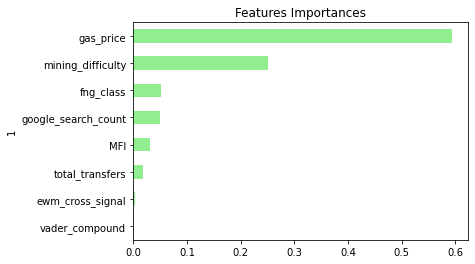

In [37]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)



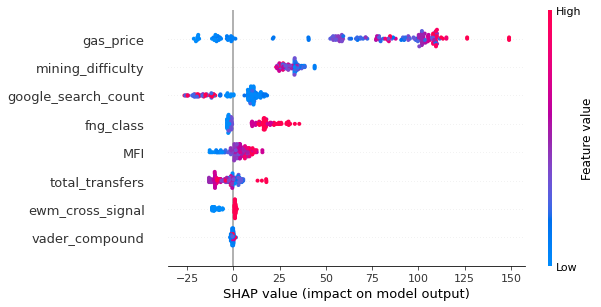

In [38]:
from sklearn.datasets import load_boston
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [39]:
# “Gini importance“. In the case of a random forest regressor, the importance is assessed by how much a feature decreases
# the weighted variance in a tree (in the case of classification it’s not variance but Gini impurity). The weight is 
# computed through the fraction of the sample reaching a given node (where the feature is used). 
#This is the method used by scikit-learn. 

In [40]:
# save figure (.png)


## Random Forest Regressor Model Evaluation

In [41]:
# r2_score (fit score) test
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, rf_model.predict(X_test))

-0.660570512779628

In [42]:
# r2_score train
r2_score(y_train, rf_model.predict(X_train))

0.9885927363792095

In [43]:
# FIX PERCENTAGE mean squared error
mean_squared_error(y_test, rf_model.predict(X_test))

84379.74903345088

In [44]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)
#Predictions are done by averaging the prediction of each of the individual Decision Trees.

In [45]:
pred_df = pd.DataFrame(predictions, columns=['prediction_price'])
display(pred_df.dtypes)
pred_df

prediction_price    float64
dtype: object

,prediction_price
0,337.250
1,346.395
2,346.395
3,346.395
4,346.395
...,...
168,297.597
169,323.274
170,299.824
171,297.597


In [46]:
eth_master_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers
Date,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215


In [47]:
eth_master_train_df, eth_master_test_df= np.split(eth_master_df, [int(.8 *len(eth_master_df))])


In [48]:
pred_df.index = eth_master_test_df.index
pred_df

,prediction_price
Date,
2020-09-08,337.250
2020-09-09,346.395
2020-09-09,346.395
2020-09-09,346.395
2020-09-09,346.395
...,...
2021-01-12,297.597
2021-01-13,323.274
2021-01-14,299.824


In [50]:
#JOIN/MERGE/APPEND dataframes
eth_combined = eth_master_df.join(pred_df)
#pred_df['Date'] = eth_master_df["Date"]
#eth_combined = eth_master_df.append(pred_df, ignore_index=True)

#combined_eth_master_df = pd.concat([eth_master_test_df, pred_df], axis=1, ignore_index=True)
#eth_master_df['prediction_price'] = pred_df['prediction_price'].to_numpy()
#eth_master_df.append(pred_df, ignore_index = True)
eth_combined.tail()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price
Date,,,,,,,,,,
2021-01-12,1049.98,1.0,1.0,57.87,70.0,0.0,0.976442,0.130492,0.389656,297.597
2021-01-13,1129.90,1.0,1.0,59.34,70.0,0.0,0.979995,0.097449,0.412667,323.274
2021-01-14,1231.08,1.0,1.0,63.03,70.0,0.0,0.982190,0.130189,0.714004,299.824
2021-01-15,1168.24,1.0,1.0,60.28,70.0,0.0,0.983228,0.149419,0.396231,297.597
2021-01-16,1260.48,1.0,1.0,62.48,70.0,0.0,1.000000,0.124411,0.300899,302.594


In [51]:
#add column for "actual_day_positive_move" positive move = true & negative move = false
eth_combined["actual_day_positive_move"] = eth_combined["close_price"]-eth_combined["close_price"].shift(1)>0
eth_combined.tail()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move
Date,,,,,,,,,,,
2021-01-12,1049.98,1.0,1.0,57.87,70.0,0.0,0.976442,0.130492,0.389656,297.597,False
2021-01-13,1129.90,1.0,1.0,59.34,70.0,0.0,0.979995,0.097449,0.412667,323.274,True
2021-01-14,1231.08,1.0,1.0,63.03,70.0,0.0,0.982190,0.130189,0.714004,299.824,True
2021-01-15,1168.24,1.0,1.0,60.28,70.0,0.0,0.983228,0.149419,0.396231,297.597,False
2021-01-16,1260.48,1.0,1.0,62.48,70.0,0.0,1.000000,0.124411,0.300899,302.594,True


In [52]:
#add column for "predicted day positive move" positive move = true & negative move = false
eth_combined["predicted_day_positive_move"] = eth_combined["prediction_price"]-eth_combined["prediction_price"].shift(1)>0
eth_combined.tail()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move
Date,,,,,,,,,,,,
2021-01-12,1049.98,1.0,1.0,57.87,70.0,0.0,0.976442,0.130492,0.389656,297.597,False,False
2021-01-13,1129.90,1.0,1.0,59.34,70.0,0.0,0.979995,0.097449,0.412667,323.274,True,True
2021-01-14,1231.08,1.0,1.0,63.03,70.0,0.0,0.982190,0.130189,0.714004,299.824,True,False
2021-01-15,1168.24,1.0,1.0,60.28,70.0,0.0,0.983228,0.149419,0.396231,297.597,False,False
2021-01-16,1260.48,1.0,1.0,62.48,70.0,0.0,1.000000,0.124411,0.300899,302.594,True,True


In [53]:
# add "correct call" column if both had true or both had false we have a true 
eth_combined["correct_call"] = np.where(eth_combined["actual_day_positive_move"]==eth_combined["predicted_day_positive_move"], True, False)
eth_combined

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move,correct_call
Date,,,,,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513,NaN,False,False,True
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970,NaN,True,False,False
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN,False,False,True
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN,False,False,True
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12,1049.98,1.0,1.0,57.87,70.0,0.0,0.976442,0.130492,0.389656,297.597,False,False,True
2021-01-13,1129.90,1.0,1.0,59.34,70.0,0.0,0.979995,0.097449,0.412667,323.274,True,True,True
2021-01-14,1231.08,1.0,1.0,63.03,70.0,0.0,0.982190,0.130189,0.714004,299.824,True,False,False


In [59]:
#Remove rows w/o predicted prices
eth_calls = eth_combined.iloc[872:]
eth_calls.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move,correct_call
Date,,,,,,,,,,,,,
2020-09-27,351.90,-1.0,0.0,66.52,6.0,0.0,0.751274,0.106224,0.270217,386.104,False,False,True
2020-09-28,351.90,-1.0,-0.5,62.55,6.0,0.0,0.748886,0.170731,0.345825,365.202,False,False,True
2020-09-29,351.90,-1.0,-0.5,69.89,6.0,0.0,0.747971,0.218155,0.390752,355.424,False,False,True
2020-09-30,359.69,-1.0,0.0,66.14,6.0,0.0,0.754082,0.167510,0.396231,346.395,True,False,False
2020-09-30,359.69,-1.0,0.0,66.14,6.0,0.0,0.754082,0.167510,0.396231,346.395,False,False,True


In [60]:
# convert to pivot table
eth_calls = eth_calls.pivot_table(index=['correct_call'], aggfunc='size')
eth_calls

correct_call
False     60
True     103
dtype: int64

In [61]:
# calculate lose rate
eth_calls['lose_rate'] = (eth_calls.iloc[0] / (163))*100
eth_calls

correct_call
False         60.000000
True         103.000000
lose_rate     36.809816
dtype: float64

In [62]:
# calculate win rate
eth_calls['win_rate'] = (eth_calls.iloc[1] / (163))*100
eth_calls

correct_call
False         60.000000
True         103.000000
lose_rate     36.809816
win_rate      63.190184
dtype: float64

In [64]:
eth_master_pct_change = eth_master_df.pct_change()
eth_master_pct_change_corr = eth_master_pct_change.corr()
eth_master_pct_change_corr


,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers
close_price,1.000000,-0.006731,-0.028727,0.432295,0.000110,0.040061,-0.018674,-0.063278,-0.025849
ewm_cross_signal,-0.006731,1.000000,0.014340,0.002019,-0.020377,0.087561,0.039564,-0.002533,-0.119244
fng_class,-0.028727,0.014340,1.000000,0.028978,0.020765,-0.031279,0.003336,-0.012435,-0.037403
MFI,0.432295,0.002019,0.028978,1.000000,-0.013445,0.006864,-0.005997,-0.062296,-0.043755
google_search_count,0.000110,-0.020377,0.020765,-0.013445,1.000000,0.013661,0.000340,-0.006870,0.097119
vader_compound,0.040061,0.087561,-0.031279,0.006864,0.013661,1.000000,0.008337,-0.013346,-0.089090
mining_difficulty,-0.018674,0.039564,0.003336,-0.005997,0.000340,0.008337,1.000000,0.050539,-0.047765
gas_price,-0.063278,-0.002533,-0.012435,-0.062296,-0.006870,-0.013346,0.050539,1.000000,0.185864
total_transfers,-0.025849,-0.119244,-0.037403,-0.043755,0.097119,-0.089090,-0.047765,0.185864,1.000000


Text(0.5, 1.0, 'Heatmap of LSTM Model Features (ETHER)')

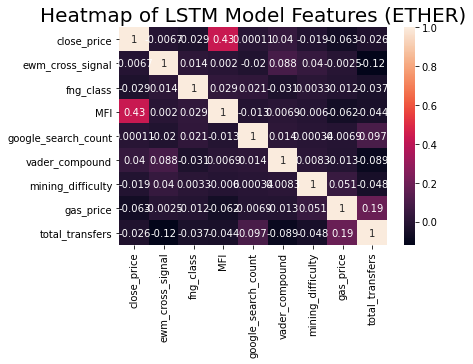

In [65]:
import seaborn as sns
sns.heatmap(eth_master_pct_change_corr, annot=True)
plt.title('Heatmap of LSTM Model Features (ETHER)', fontsize = 20)

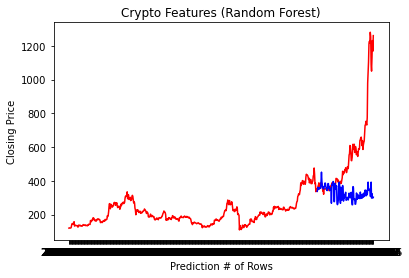

In [294]:
#rf_plot = pd.concat(eth_master_df['close_price'], pred_df['prediction_price'])
#plt.plot(rf_plot, color = 'red', label = 'Ethereum RF')
plt.plot(eth_combined['close_price'],color = 'red', label = 'real eth') 
plt.plot(eth_combined["prediction_price"], color='blue') # , regressor.predict(predictions),
plt.title("Crypto Features (Random Forest)")
plt.xlabel('Prediction # of Rows')
plt.ylabel('Closing Price')
plt.show()

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

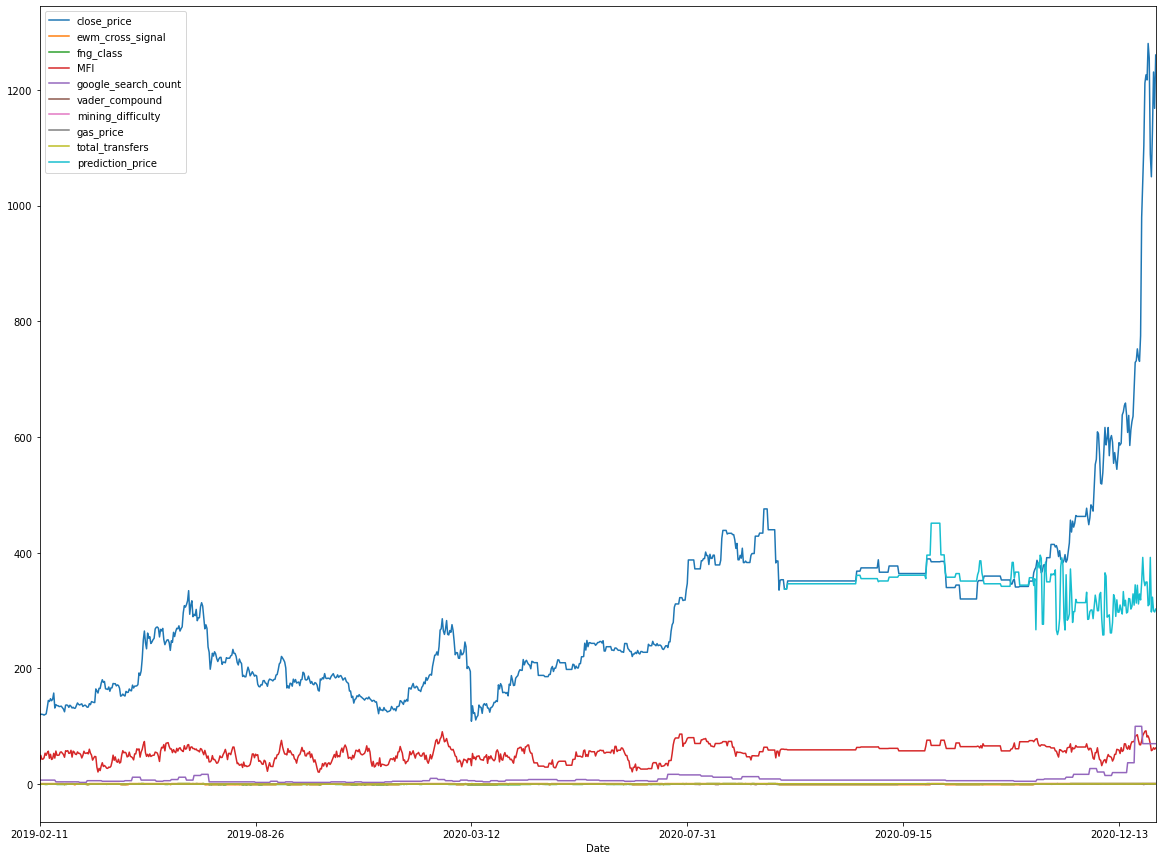

In [295]:
eth_combined.plot(figsize = [20,15])

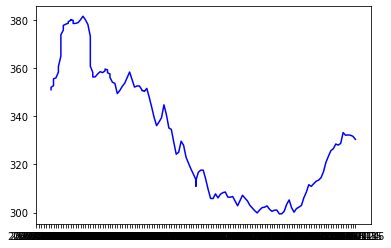

In [305]:
test_pred = pred_df.rolling(window=21).mean()
plt.plot(test_pred['prediction_price'],color = 'blue', label = 'prediction smooth') 

In [306]:
pred_df.shape()

TypeError: 'tuple' object is not callable

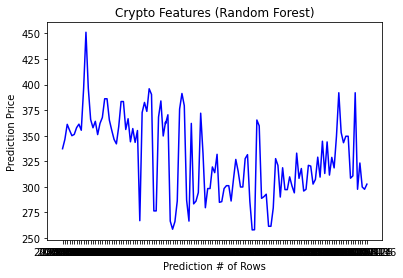

In [307]:
plt.plot(pred_df['prediction_price'],color = 'blue', label = 'prediction eth') 
#plt.plot(predictions, color='blue') # , regressor.predict(predictions),
plt.title("Crypto Features (Random Forest)")
plt.xlabel('Prediction # of Rows')
plt.ylabel('Prediction Price')
plt.show()

In [308]:
# save figure (.png)


## Decision Tree

In [309]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn import tree

In [310]:
# Prepare the data data
#boston = datasets.load_boston()
#X = boston.data
#y = boston.target
dataset = eth_master_df
X = eth_master_df[['close_price','ewm_cross_signal','fng_class','MFI','google_search_count', 'vader_compound', 'mining_difficulty', 'gas_price', 'total_transfers']]
y = eth_master_df["close_price"].ravel()

In [311]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, min_samples_leaf=25, random_state=78)
model = regr.fit(X, y)

In [312]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 328.48
|   |--- feature_0 <= 203.59
|   |   |--- feature_0 <= 159.46
|   |   |   |--- value: [137.99]
|   |   |--- feature_0 >  159.46
|   |   |   |--- value: [180.29]
|   |--- feature_0 >  203.59
|   |   |--- feature_0 <= 258.39
|   |   |   |--- value: [228.78]
|   |   |--- feature_0 >  258.39
|   |   |   |--- value: [287.99]
|--- feature_0 >  328.48
|   |--- feature_0 <= 637.87
|   |   |--- feature_0 <= 496.64
|   |   |   |--- value: [390.66]
|   |   |--- feature_0 >  496.64
|   |   |   |--- value: [581.51]
|   |--- feature_0 >  637.87
|   |   |--- value: [946.87]



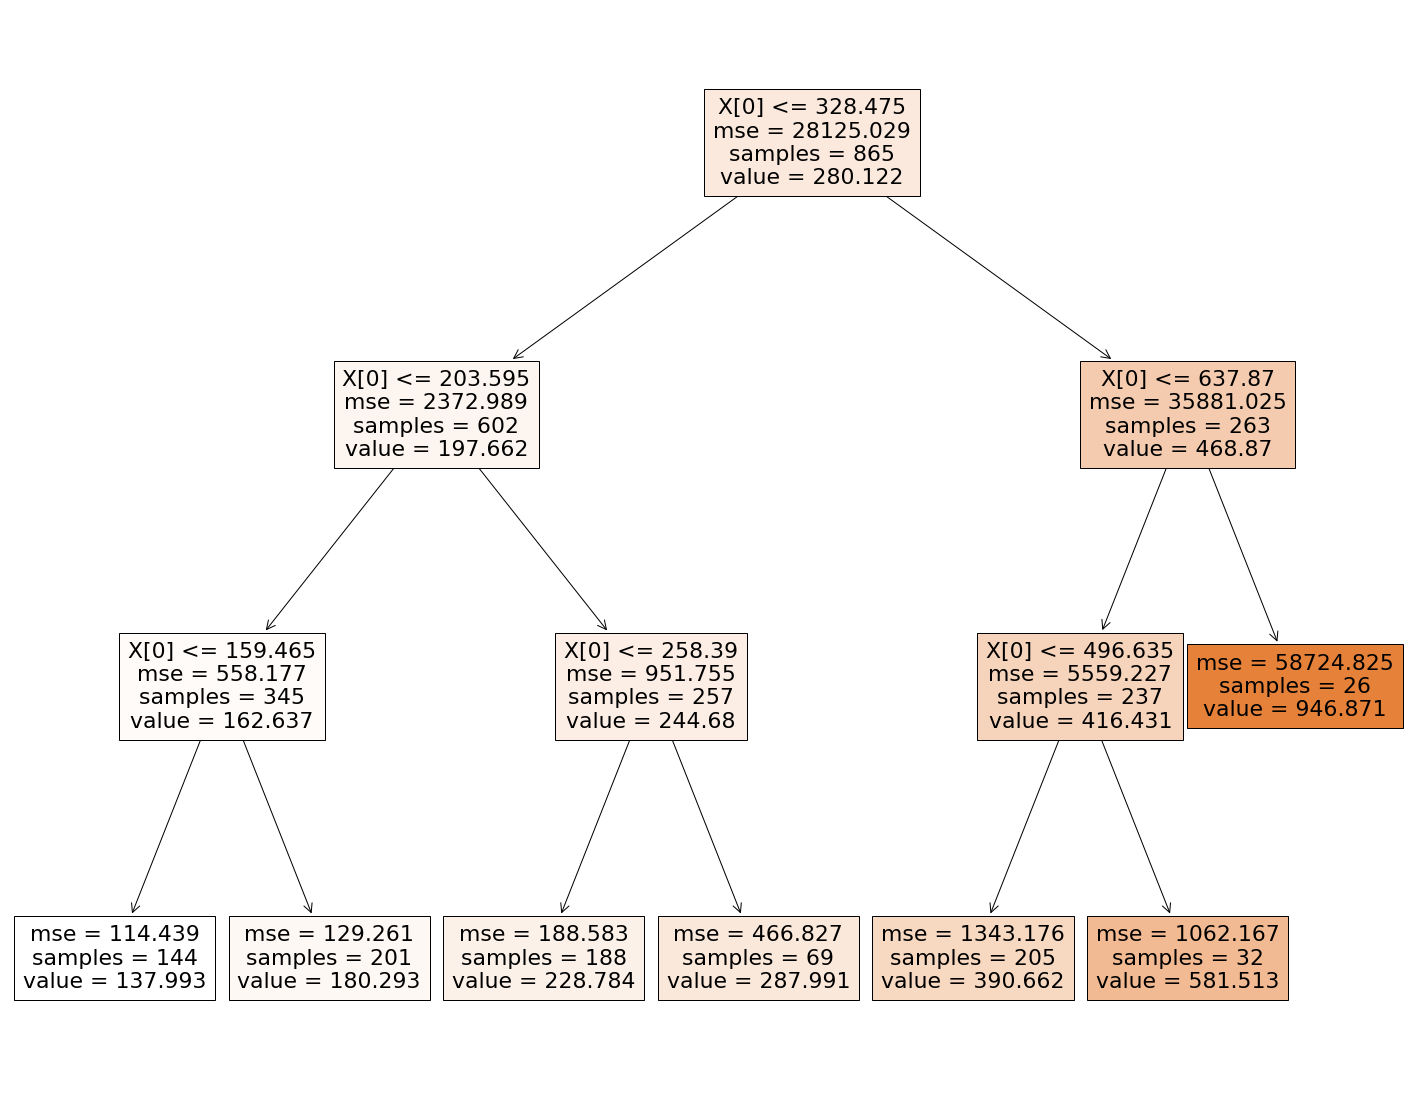

In [313]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True) # feature_names=dataset.feature_names,

In [314]:
# save figure (.png)


### THE CODE BELOW IS GOOD

## LSTM RNN for Historical Closing Prices and Predicted Closing Prices

In [315]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(eth_master_df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(eth_master_df) - window - 1):
        features = eth_master_df.iloc[i:(i + window), feature_col_number]
        target = eth_master_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [316]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'Date' column
# Column index 1 is the `Close Price` column
feature_column = 0
target_column = 0
X, y = window_data(eth_master_df, window_size, feature_column, target_column)

In [317]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [318]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [319]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

---

## Build and Train the LSTM RNN for Historical Closing Prices

In this section, you will design a custom LSTM RNN and fit (train) it using the training data.

You will need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

### Hints:
You will want to use the same model architecture and random seed for both notebooks. This is necessary to accurately compare the performance of the FNG model vs the closing price model. 

In [320]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [321]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [322]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [323]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 30)            3840      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [324]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=50, shuffle=False, batch_size=100, verbose=0)

---

## Model Performance

In this section, you will evaluate the model using the test data. 

You will need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [325]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

9/9 [==============================] - 1s 5ms/step - loss: 0.0029


0.0028873488772660494

In [326]:
# Make some predictions
predicted = model.predict(X_test)

In [344]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [345]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_master_df.index[-len(real_prices): ]) 
stocks.head(20)

,Real,Predicted
Date,,
2020-08-02,372.17,362.255890
2020-08-02,372.17,371.604340
2020-08-02,372.17,380.142548
2020-08-02,372.17,385.641998
2020-08-02,372.17,389.207062
2020-08-03,372.17,387.175201
2020-08-03,386.21,385.020966
2020-08-04,386.21,383.107147
2020-08-04,389.91,381.750366


/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Ethereum Historical Real Price vs. Predicted Price'}, xlabel='Date'>

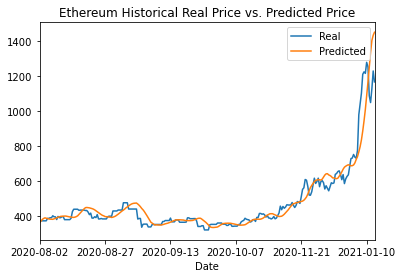

In [346]:
# Plot the real vs predicted values as a line chart
stocks.plot.line(legend=True, title="Ethereum Historical Real Price vs. Predicted Price")

In [347]:
stocks["actual_day_positive_move"] = stocks["Real"]-stocks["Real"].shift(1)>0
stocks.tail()

,Real,Predicted,actual_day_positive_move
Date,,,
2021-01-12,1088.94,1254.011841,False
2021-01-13,1049.98,1337.210327,False
2021-01-14,1129.90,1406.040405,True
2021-01-15,1231.08,1435.294067,True
2021-01-16,1168.24,1452.961792,False


In [348]:
stocks["predicted_day_positive_move"] = stocks["Predicted"]-stocks["Predicted"].shift(1)>0
stocks.tail()

,Real,Predicted,actual_day_positive_move,predicted_day_positive_move
Date,,,,
2021-01-12,1088.94,1254.011841,False,True
2021-01-13,1049.98,1337.210327,False,True
2021-01-14,1129.90,1406.040405,True,True
2021-01-15,1231.08,1435.294067,True,True
2021-01-16,1168.24,1452.961792,False,True


In [349]:
stocks["correct_call"] = np.where(stocks["actual_day_positive_move"]==stocks["predicted_day_positive_move"], True, False)
stocks.head()

,Real,Predicted,actual_day_positive_move,predicted_day_positive_move,correct_call
Date,,,,,
2020-08-02,372.17,362.255890,False,False,True
2020-08-02,372.17,371.604340,False,True,False
2020-08-02,372.17,380.142548,False,True,False
2020-08-02,372.17,385.641998,False,True,False
2020-08-02,372.17,389.207062,False,True,False


In [350]:
# convert to pivot table
stocks = stocks.pivot_table(index=['correct_call'], aggfunc='size')
stock_pivot = stocks
stock_pivot

correct_call
False    144
True     113
dtype: int64

In [351]:
# calculate lose rate
stock_pivot['lose_rate'] = (stock_pivot.iloc[0] / (257))*100
stock_pivot

correct_call
False        144.000000
True         113.000000
lose_rate     56.031128
dtype: float64

In [352]:
# calculate win rate
stock_pivot['win_rate'] = (stock_pivot.iloc[1] / (257))*100
stock_pivot

correct_call
False        144.000000
True         113.000000
lose_rate     56.031128
win_rate      43.968872
dtype: float64

In [ ]:
# save figure (.png)
